# Ramia - Assignment 1

The MSPA Software Survey was collected in December 2016. Data from the survey were used to inform data science curriculum planning. This data will be used to explore various questions regarding student preferences and interests, as well as help examine the effects of two transformations (scaling methods).

**Part 1: Data Exploration**

The MSPA Survey was designed with the following objectives in mind:

    1. Learn about current student software preferences.
    2. Learn about student interest in potential new courses.
    3. Guide software and systems planning for current and future courses.
    4. Guide data science curriculum planning.

First load the following external libraries for visualizations and data manipulation.
Ensure that these packages have been installed prior to calls.

In [1]:
import pandas as pd  # data frame operations  
from pandas.plotting import scatter_matrix
import numpy as np  # arrays and math functions
import matplotlib.pyplot as plt  # static plotting
import seaborn as sns  # pretty plotting, including heat map
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

Read in the comma-delimited text file, creating a pandas DataFrame object.
Use the RespondentID as label for the rows, the index of DataFrame.

In [2]:
valid_survey_input = pd.read_csv('mspa-survey-data.csv')
valid_survey_input.set_index('RespondentID', drop = True, inplace = True)

Many of the variable names in the survey data are quite long, so we're going to shorten them for easier interpretation.

In [3]:
survey_df = valid_survey_input.rename(index=str, columns={
    'Personal_JavaScalaSpark': 'My_Java',
    'Personal_JavaScriptHTMLCSS': 'My_JS',
    'Personal_Python': 'My_Python',
    'Personal_R': 'My_R',
    'Personal_SAS': 'My_SAS',
    'Professional_JavaScalaSpark': 'Prof_Java',
    'Professional_JavaScriptHTMLCSS': 'Prof_JS',
    'Professional_Python': 'Prof_Python',
    'Professional_R': 'Prof_R',
    'Professional_SAS': 'Prof_SAS',
    'Industry_JavaScalaSpark': 'Ind_Java',
    'Industry_JavaScriptHTMLCSS': 'Ind_JS',
    'Industry_Python': 'Ind_Python',
    'Industry_R': 'Ind_R',
    'Industry_SAS': 'Ind_SAS',
    'Python_Course_Interest': 'Python_Course', 
    'Foundations_DE_Course_Interest': 'Foundations_Course', 
    'Analytics_App_Course_Interest': 'App_Course', 
    'Systems_Analysis_Course_Interest': 'Systems_Course'})

Examine the structure of the DataFrame object:

1. Use len() to get the number of observations.
2. Show the variable names of the DataFrame (note that RespondentID is no longer present).
3. Print the first five rows and columns of the DataFrame.

In [4]:
print('\n--- Contents of initial survey data ---')
print('\nNumber of Respondents =', len(survey_df)) 
print('\nList of Variables:', '\n'*2, list(survey_df))
print('\nFirst 5 Rows/Columns of Data:', '\n'*2, survey_df.iloc[:5,:5])


--- Contents of initial survey data ---

Number of Respondents = 207

List of Variables: 

 ['My_Java', 'My_JS', 'My_Python', 'My_R', 'My_SAS', 'Prof_Java', 'Prof_JS', 'Prof_Python', 'Prof_R', 'Prof_SAS', 'Ind_Java', 'Ind_JS', 'Ind_Python', 'Ind_R', 'Ind_SAS', 'Python_Course', 'Foundations_Course', 'App_Course', 'Systems_Course', 'Courses_Completed', 'PREDICT400', 'PREDICT401', 'PREDICT410', 'PREDICT411', 'PREDICT413', 'PREDICT420', 'PREDICT422', 'PREDICT450', 'PREDICT451', 'PREDICT452', 'PREDICT453', 'PREDICT454', 'PREDICT455', 'PREDICT456', 'PREDICT457', 'OtherPython', 'OtherR', 'OtherSAS', 'Other', 'Graduate_Date']

First 5 Rows/Columns of Data: 

               My_Java  My_JS  My_Python  My_R  My_SAS
RespondentID                                         
5135740122          0      0          0    50      50
5133300037         10     10         50    30       0
5132253300         20      0         40    40       0
5132096630         10     10         25    35      20
5131990362     

Define a subset DataFrame for analysis of software preferences and explore the descriptive statistics of this subset below.

In [5]:
software_df = survey_df.loc[:,'My_Java':'Ind_SAS']

print('\nSoftware Descriptive Statistics:')
software_df.describe().round(1)


Software Descriptive Statistics:


,My_Java,My_JS,My_Python,My_R,My_SAS,Prof_Java,Prof_JS,Prof_Python,Prof_R,Prof_SAS,Ind_Java,Ind_JS,Ind_Python,Ind_R,Ind_SAS
count,207.0,207.0,207.0,207.0,207.0,207.0,207.0,207.0,207.0,207.0,207.0,207.0,207.0,207.0,207.0
mean,10.1,4.8,31.3,37.1,16.6,9.3,5.8,30.0,36.4,18.5,11.9,7.0,29.8,32.4,18.9
std,11.4,6.8,15.6,14.6,13.6,13.2,10.8,19.1,20.8,18.8,14.7,10.0,18.0,15.9,19.1
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,0.0,0.0,20.0,30.0,5.0,0.0,0.0,20.0,25.0,0.0,0.0,0.0,20.0,22.5,0.0
50%,9.0,0.0,30.0,35.0,15.0,5.0,0.0,30.0,33.0,15.0,5.0,0.0,30.0,30.0,15.0
75%,20.0,10.0,40.0,50.0,25.0,15.0,10.0,40.0,50.0,30.0,20.0,10.0,40.0,40.0,30.0
max,70.0,30.0,90.0,100.0,75.0,80.0,100.0,100.0,100.0,100.0,70.0,50.0,95.0,85.0,100.0


The main takeaway from these desciptive statistics is that, on average, students have a greater interest in learning Python and R compared to any other software.

Next, create a scatterplot matrix for personal software preferences.

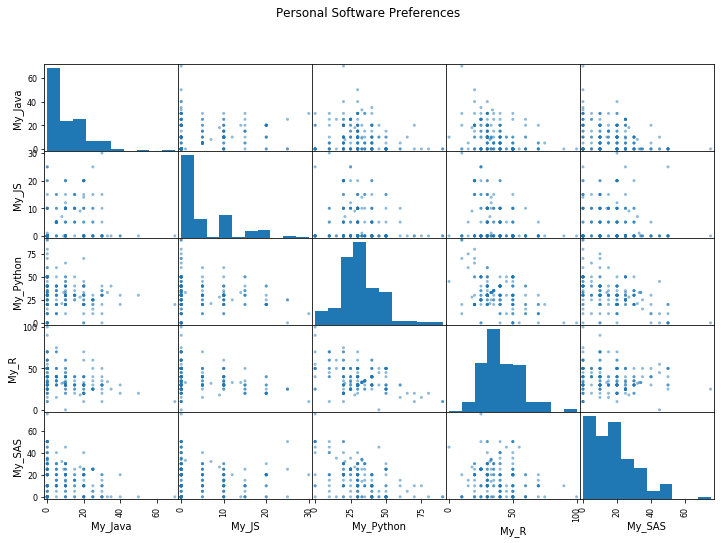

In [6]:
scatter_matrix(software_df.iloc[:,:5], figsize=(12, 8))
plt.suptitle('Personal Software Preferences')
plt.show()

The results of the scatterplot matrix appear to reiterate the findings of the descriptive statistics. Although the scatterplots show no apparant relationships among these variables, the histograms make it clear that students' ratings of their interest in Python and R are much higher compared to other software, on average.

The following code defines a function for building correlation heat maps using seaborn. This is meant to examine intercorrelations among software preference variables.

We demonstrate it's functionality using the software dataframe below.

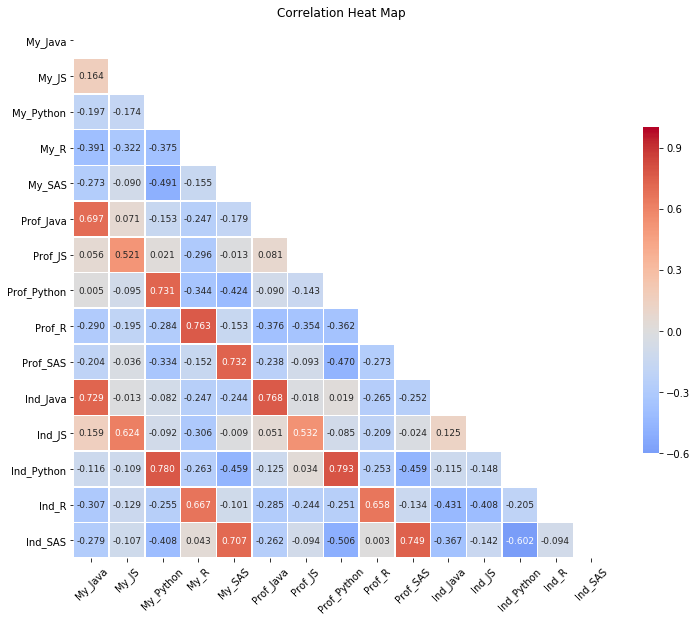

In [7]:
def corr_chart(df_corr):
    corr=df_corr.corr()
    #screen top half to get a triangle
    top = np.zeros_like(corr, dtype=np.bool)
    top[np.triu_indices_from(top)] = True
    fig, ax = plt.subplots(figsize=(12,12))
    sns.heatmap(corr, mask=top, cmap='coolwarm', 
        center = 0, square=True, 
        linewidths=.5, cbar_kws={'shrink':.5}, 
        annot = True, annot_kws={'size': 9}, fmt = '.3f')           
    plt.xticks(rotation=45) # rotate variable labels on columns (x axis)
    plt.yticks(rotation=0) # use horizontal variable labels on rows (y axis)
    plt.title('Correlation Heat Map')

corr_chart(software_df)

Two main insights can be taken from this correlation heat map:

1. As would be expected, students who are interested in learning a particular software also believe in it's importance to the field, as well as have a professional need to learn that software.

2. There seems to be some strong polarization among student's who prefer Python vs. R vs. SAS. In other words, if a student is intrested in learning Python, they are typically not interested in learning R or SAS, and vise-versa.

Slightly less apparant is students' preferences for Java and Javascript being negatively correlated with their preferences for R and SAS (and less so, Python).

Define a subset DataFrame for analysis of course interests and explore the descriptive statistics of this subset below.

In [8]:
courses_df = survey_df.loc[:,'Python_Course':'Systems_Course']

print('\nCourses Descriptive Statistics:')
courses_df.describe().round(1)


Courses Descriptive Statistics:


,Python_Course,Foundations_Course,App_Course,Systems_Course
count,206.0,200.0,203.0,200.0
mean,73.5,58.0,55.2,53.6
std,29.8,32.6,34.1,33.5
min,0.0,0.0,0.0,0.0
25%,53.0,29.5,25.0,21.5
50%,82.5,60.0,60.0,51.5
75%,100.0,89.2,85.0,80.2
max,100.0,100.0,100.0,100.0


The main takeaway from these descriptive statistics is that there is a decent amount of interest in these new courses, with the Python course receiving the highest ratings, on average.

More specifically, on average, students rated their interest in the Foundations course, the Apps course, and the Systems course as around 50% on average. Students rated their interest in the Python course higher, at around 75% on average.

Next, create a scatterplot matrix for course interest.

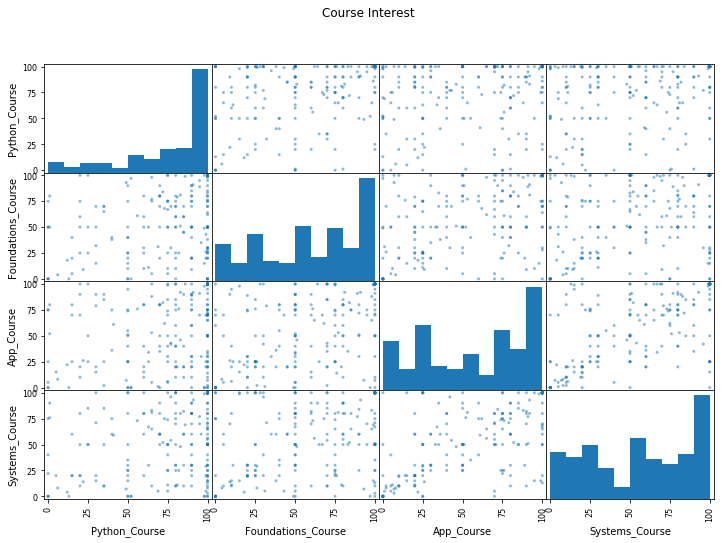

In [9]:
scatter_matrix(courses_df, figsize=(12, 8))
plt.suptitle('Course Interest')
plt.show()

Again, the results of the scatterplot matrix appear to reiterate the findings of the descriptive statistics. Although the scatterplots show no apparant relationships among these variables, the histograms make it clear that students' ratings of their interest in the Python course are much higher compared to other courses, on average.

We can also use the correlation heatmap function to examine intercorrelations among course interest variables.

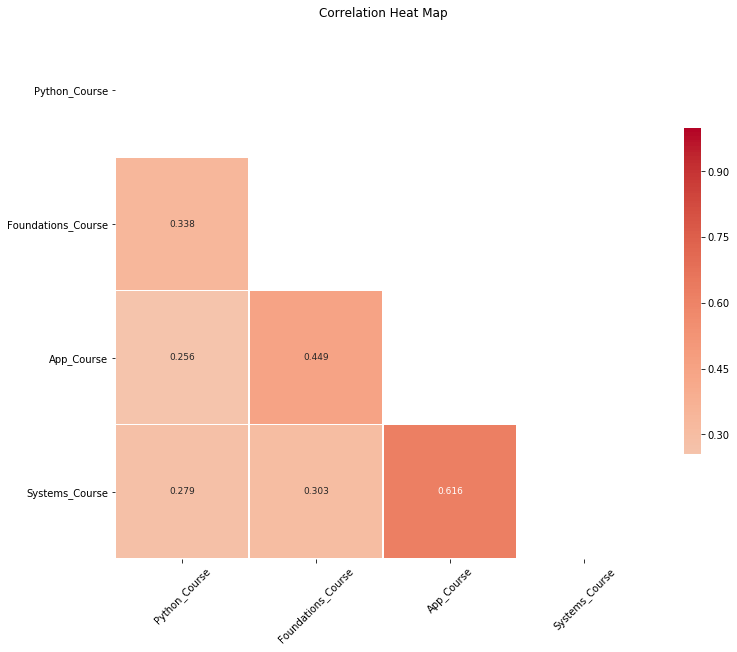

In [10]:
corr_chart(courses_df)

Nothing terribly interesting about this correlation heatmap. One possible takeaway is that students who are interested in the systems course also appear to be interested in the apps course. Perhaps these two courses could be packaged into one specialization.

*If I were to make a recommendation for the future of this program, it would be to place an emphasis on Python, while possibly also offering sections of courses that focus on R or SAS.*

**Part 2: Transformations**

For the sake of examining the effects of transformations, we will focus in on one variable in particular - Courses Completed. Below are the descriptive statistics for this variable, which show a fairly balanced mix of students from all different stages of the program.

In [11]:
print('\n--- Descriptive Statistics for Courses Completed ---')
print(survey_df['Courses_Completed'].describe().round(1))


--- Descriptive Statistics for Courses Completed ---
count    187.0
mean       6.3
std        3.2
min        1.0
25%        4.0
50%        6.0
75%        9.0
max       12.0
Name: Courses_Completed, dtype: float64


To begin with transformations, first isolate the variable to be used for examination and eliminate missing values.

Next, use reshape() to convert the data from a dataframe to a two-dimensional array.

In [12]:
X = survey_df['Courses_Completed'].dropna()
X = X.values.reshape(-1, 1)

It is often best to use scaling methods that preserve the shape of the distribution. But if there are extreme outliers or heavily skewed distributions, then log or normalizing transformations may be warranted.

Seaborn provides a convenient way to show the effects of transformations on the distribution of values being transformed.

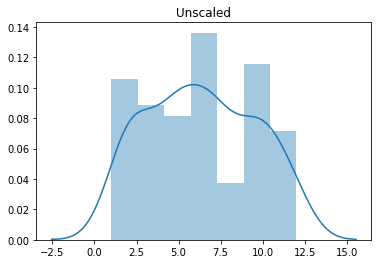

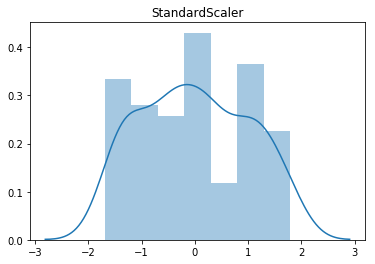

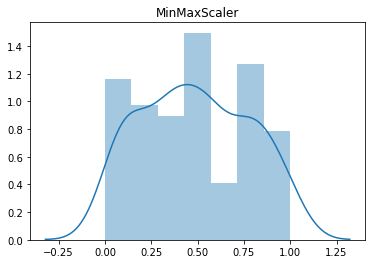

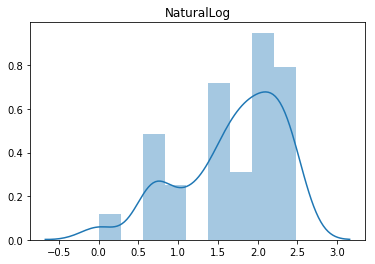

In [13]:
sns.distplot(X).set_title('Unscaled')
plt.show()

sns.distplot(StandardScaler().fit_transform(X)).set_title('StandardScaler')
plt.show()

sns.distplot(MinMaxScaler().fit_transform(X)).set_title('MinMaxScaler')
plt.show()

sns.distplot(np.log(X)).set_title('NaturalLog')
plt.show()

*As made apparant above, standard and min-max scalers do not affect the distribution of the data, while natural log transformations do.*